In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt
import os

from data_preprocessing import *
from models.ResNet_cifar10 import Net
# from cutout.mult_cutout import CutOut

2024-04-13 19:56:20.913916: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-04-13 19:56:24.083676: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


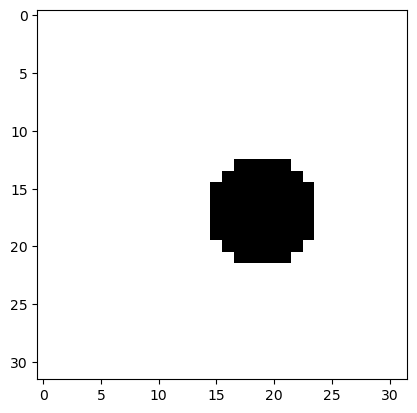

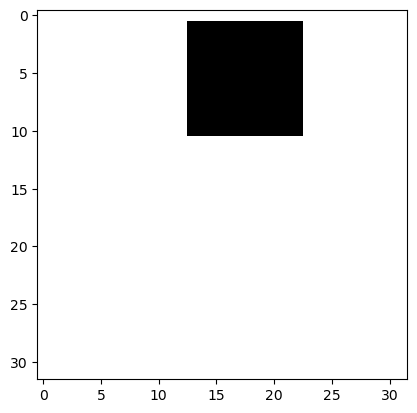

In [2]:
# test random cutout
img = tf.ones([32, 32, 3], dtype=tf.float32)
img_cut = random_cutout(img, 10, p=1, shape='circle')

plt.imshow(img_cut)
plt.show()
img_cut = random_cutout(img, 10, p=1, shape='square')
plt.imshow(img_cut)
plt.show()

In [3]:
(train_ds, test_ds), metadata = tfds.load('cifar10', split=['train', 'test'], as_supervised=True, with_info=True)
label_names = metadata.features['label'].names
print(label_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
train_data_no_cutout = prepare_dataset(train_ds, "train")
test_data = prepare_dataset(test_ds, "test")

# rnd_cutout = RandomCutout(cutout_size=16)
# make surrogate image
# img = tf.random.uniform((32, 32, 3))
# res = rnd_cutout(img)
# train_data_cutout =preprocess(train_ds, 32, True, rnd_cutout)



train_ds


2024-04-13 19:56:24.851616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [1]
	 [[{{node Placeholder/_3}}]]
2024-04-13 19:56:24.852147: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 19:56:31.651362: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline s

(32, 32, 3)
(32, 32, 3)


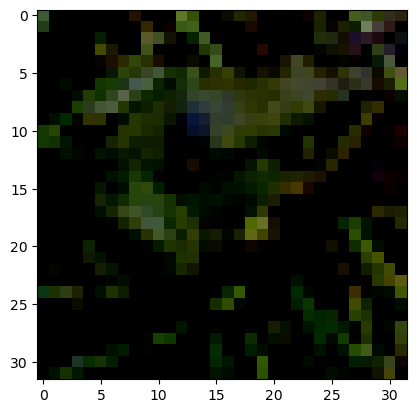

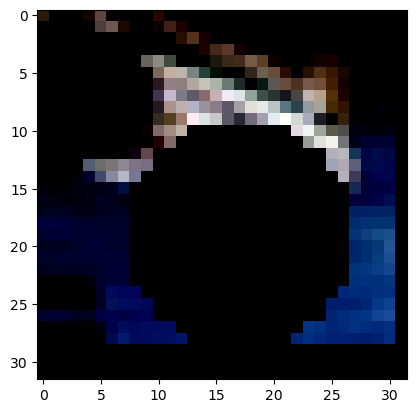

In [5]:
img_train = iter(train_data_no_cutout.take(1)).next()[0][0]
img_test = iter(test_data.take(1)).next()[0][0]
print(img_test.shape)
print(img_train.shape)
plt.imshow(img_test)
plt.show()
plt.imshow(img_train)
plt.show()

2024-04-13 19:56:32.503161: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [1]
	 [[{{node Placeholder/_3}}]]
2024-04-13 19:56:32.503671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [1]
	 [[{{node Placeholder/_2}}]]
2024-04-13 19:56:39.888709: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline s

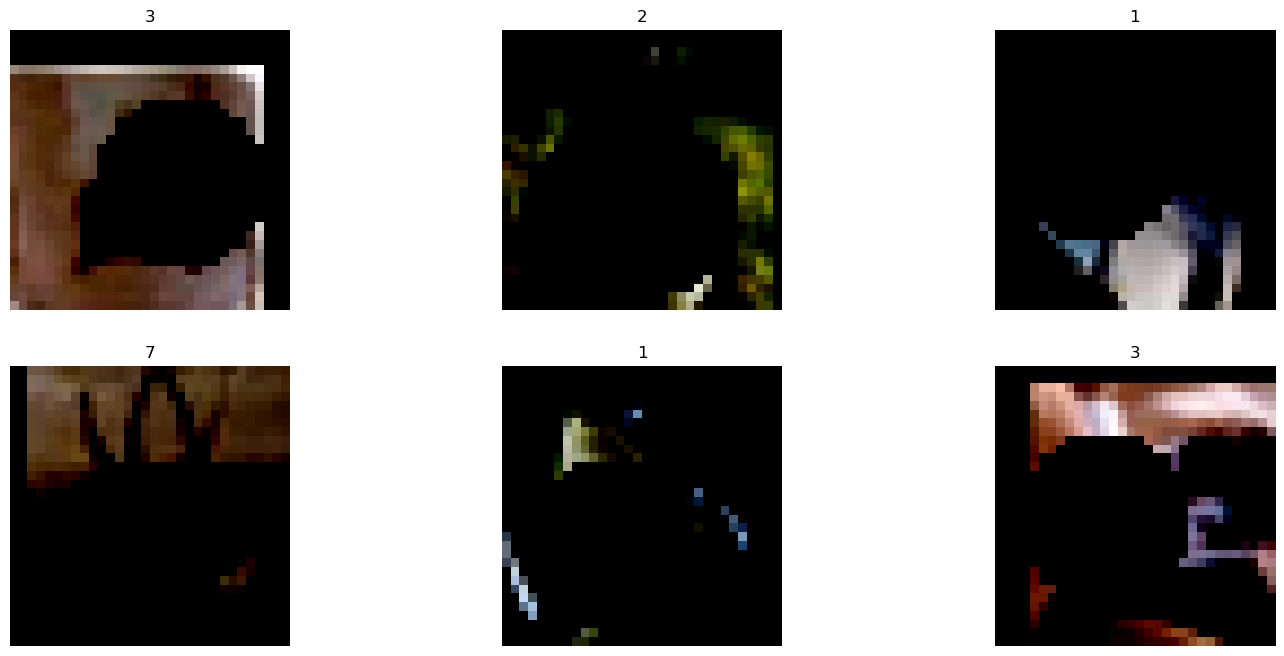

In [6]:
# visualize the training and test data
# rnd_cutout.cutout_size = 20
import matplotlib.pyplot as plt
num_samples = 6
max_plots_per_row = 3  
num_columns = min(num_samples, max_plots_per_row)
num_rows = (num_samples + max_plots_per_row - 1) // max_plots_per_row 
fig_width = num_columns * 6
fig_height = num_rows * 4
# create the subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(fig_width, fig_height))
# flatten the array of axes
# ensure its an array in case of single sample
axes = np.asarray(axes).flatten()

for i, (image, label) in enumerate(train_data_no_cutout.take(num_samples)):
    axes[i].imshow(image[0])
    # set the title to the int of the one-hot encoding
    axes[i].set_title(np.argmax(label[0]))
    axes[i].axis('off')


In [7]:
model = Net()
model.build((None, 32, 32, 3))  # Necessary to create the model's weights
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  896       
                                                                 
 conv2d_1 (Conv2D)           multiple                  18496     
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  295040    
                                                                 
 dense_1 (Dense)             multiple                  1290      
                                                               

In [8]:
train_data_no_cutout = train_data_no_cutout.take(100)
val_ds = train_data_no_cutout.take(10)
train_data_no_cutout = train_data_no_cutout.skip(10)
history = model.fit(train_data_no_cutout, epochs=2, validation_data=val_ds)

# Ensure the directory exists and save the model weights
os.makedirs('trained_models', exist_ok=True)
model.save_weights('trained_models/ResNet_cifar10.h5')

Epoch 1/2


2024-04-13 19:56:40.577465: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2024-04-13 19:56:40.577863: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [1]
	 [[{{node Placeholder/_3}}]]


90/90 [==============================] - ETA: 0s - loss: 2.1688 - accuracy: 0.1868

2024-04-13 19:57:19.134316: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-04-13 19:57:19.261272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]
2024-04-13 19:57:19.263994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a val

90/90 [==============================] - 45s 406ms/step - loss: 2.1688 - accuracy: 0.1868 - val_loss: 2.0701 - val_accuracy: 0.2375


2024-04-13 19:57:25.375855: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Epoch 2/2
90/90 [==============================] - ETA: 0s - loss: 2.0512 - accuracy: 0.2465

2024-04-13 19:58:40.021864: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-04-13 19:58:48.594991: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


90/90 [==============================] - 46s 424ms/step - loss: 2.0512 - accuracy: 0.2465 - val_loss: 1.9674 - val_accuracy: 0.2719


In [9]:
print(history.params, history.history.keys())
print(history.history['val_accuracy'])

{'verbose': 1, 'epochs': 2, 'steps': 90} dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[0.23749999701976776, 0.2718749940395355]


2024-04-13 19:59:25.199776: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]
2024-04-13 19:59:25.200286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 0s 78ms/step


Predicted labels: [7 7 4 7 2 2 0 7 1 0 1 0 0 7 7 1 0 5 3 0 7 0 0 6 2 7 0 2 9 0 1 4]
Actual labels: [5 6 6 6 1 2 2 3 9 9 9 1 7 2 4 5 8 3 3 8 7 0 2 4 7 7 1 5 9 8 8 6]


Text(0.5, 1.0, 'dog')

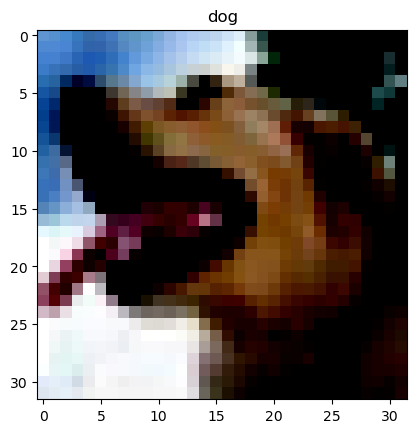

In [10]:
# Make a prediction
img , label = iter(test_data.take(1)).next()
y_pred = model.predict(img)
# print(y_pred)
# Assuming you want to print the predicted labels and actual labels
predicted_labels = np.argmax(y_pred, axis=1)
print("Predicted labels:", predicted_labels)
actual_labels = np.argmax(label, axis=1)
print("Actual labels:", actual_labels)

plt.imshow(img[0])
plt.title(label=label_names[actual_labels[0]])